In [43]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, metrics
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.decomposition import KernelPCA

rng = np.random.RandomState(1)
digits = datasets.load_digits()
images = digits.images
labels = digits.target

X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.6, shuffle=False)

In [44]:
def dataset_searcher(number_list, images, labels):
    pos = [np.where(labels == i)[0][0] for i in number_list]
    images_nparray = np.array([images[j] for j in pos])
    labels_nparray = np.array([labels[j] for j in pos])
    return images_nparray, labels_nparray

def print_numbers(images, labels, title):
    plot, arr = plt.subplots(1, len(images), figsize=(9, 3))
    plt.suptitle(title)
    for ax, img, lbl in zip(arr, images, labels):
        ax.imshow(img, cmap='binary')
        ax.set_title(lbl)
        ax.axis('off')
    plt.show()

def OverallAccuracy(results, actual_values):
    Accuracy = metrics.accuracy_score(y_true=actual_values, y_pred=results)
    return Accuracy

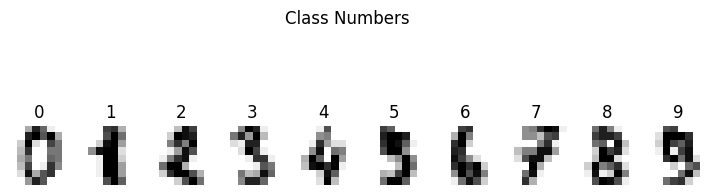

In [42]:
class_numbers = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
class_number_images, class_number_labels = dataset_searcher(class_numbers, images, labels)
print_numbers(class_number_images, class_number_labels, 'Class Numbers')

The overall accuracy of the Gaussian model is 0.8007414272474513


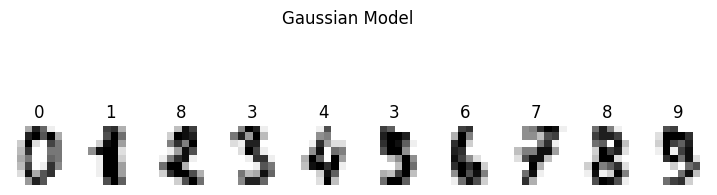

In [41]:
model_1 = GaussianNB()
X_train_reshaped = X_train.reshape(X_train.shape[0], -1)
model_1.fit(X_train_reshaped, y_train)
X_test_reshaped = X_test.reshape(X_test.shape[0], -1)
model1_results = model_1.predict(X_test_reshaped)

Model1_Overall_Accuracy = OverallAccuracy(model1_results, y_test)
print("The overall accuracy of the Gaussian model is " + str(Model1_Overall_Accuracy))

allnumbers = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
allnumbers_images, _ = dataset_searcher(allnumbers, images, labels)
reshaped_num = allnumbers_images.reshape(allnumbers_images.shape[0], -1)
print_numbers(allnumbers_images, model_1.predict(reshaped_num), 'Gaussian Model')

The overall accuracy of the KNN model is 0.9545875810936052


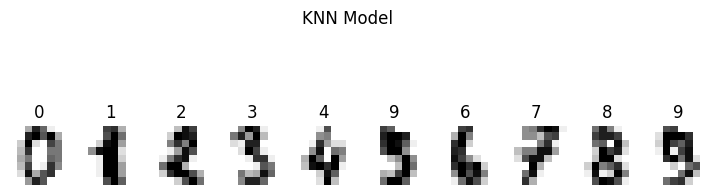

In [39]:
model_2 = KNeighborsClassifier(n_neighbors=10)
model_2.fit(X_train_reshaped, y_train)
model2_results = model_2.predict(X_test_reshaped)

Model2_Overall_Accuracy = OverallAccuracy(model2_results, y_test)
print("The overall accuracy of the KNN model is " + str(Model2_Overall_Accuracy))
print_numbers(allnumbers_images, model_2.predict(reshaped_num), 'KNN Model')

The overall accuracy of the MLP model is 0.9147358665430955


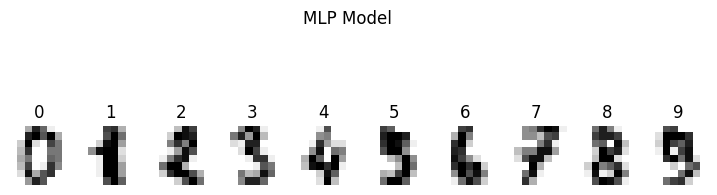

In [38]:
model_3 = MLPClassifier(random_state=0)
model_3.fit(X_train_reshaped, y_train)
model3_results = model_3.predict(X_test_reshaped)

Model3_Overall_Accuracy = OverallAccuracy(model3_results, y_test)
print("The overall accuracy of the MLP model is " + str(Model3_Overall_Accuracy))
print_numbers(allnumbers_images, model_3.predict(reshaped_num), 'MLP Model')

In [37]:
noise_scale = 10.0
poison = rng.normal(scale=noise_scale, size=X_train.shape)
X_train_poison = X_train + poison

The accuracy of the poisoned Gaussian model is 0.8146431881371641


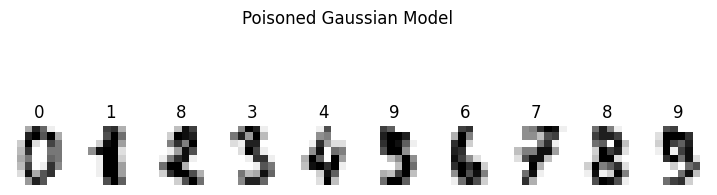

In [36]:
X_train_poison_reshaped = X_train_poison.reshape(X_train.shape[0], -1)
model_1_poisoned = GaussianNB()
model_1_poisoned.fit(X_train_poison_reshaped, y_train)
model1_poisoned_results = model_1_poisoned.predict(X_test_reshaped)

poisoned_Model1_Overall_Accuracy = OverallAccuracy(model1_poisoned_results, y_test)
print("The accuracy of the poisoned Gaussian model is " + str(poisoned_Model1_Overall_Accuracy))
print_numbers(allnumbers_images, model_1_poisoned.predict(reshaped_num), 'Poisoned Gaussian Model')

The accuracy of the poisoned KNN model is 0.6051899907321594


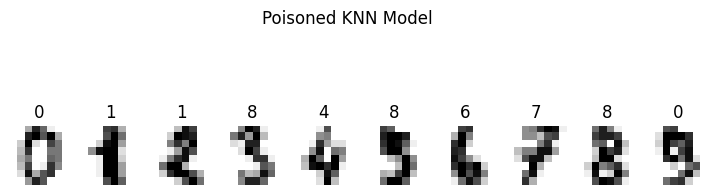

In [33]:
model_2_poisoned = KNeighborsClassifier(n_neighbors=10)
model_2_poisoned.fit(X_train_poison_reshaped, y_train)
model2_poisoned_results = model_2_poisoned.predict(X_test_reshaped)

poisoned_Model2_Overall_Accuracy = OverallAccuracy(model2_poisoned_results, y_test)
print("The accuracy of the poisoned KNN model is " + str(poisoned_Model2_Overall_Accuracy))
print_numbers(allnumbers_images, model_2_poisoned.predict(reshaped_num), 'Poisoned KNN Model')

The accuracy of the poisoned MLP model is 0.794253938832252


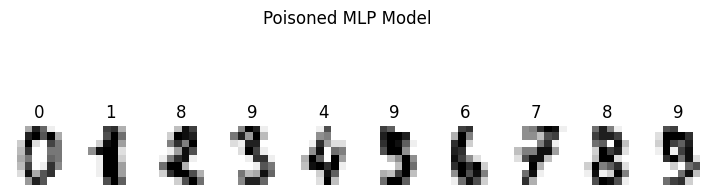

In [34]:
model_3_poisoned = MLPClassifier(random_state=0)
model_3_poisoned.fit(X_train_poison_reshaped, y_train)
model3_poisoned_results = model_3_poisoned.predict(X_test_reshaped)

poisoned_Model3_Overall_Accuracy = OverallAccuracy(model3_poisoned_results, y_test)
print("The accuracy of the poisoned MLP model is " + str(poisoned_Model3_Overall_Accuracy))
print_numbers(allnumbers_images, model_3_poisoned.predict(reshaped_num), 'Poisoned MLP Model')

In [35]:
kpca = KernelPCA(n_components=400, kernel="rbf", gamma=1e-3, fit_inverse_transform=True, alpha=5e-3)
kpca.fit(X_train_poison_reshaped)
X_train_denoised = kpca.inverse_transform(kpca.transform(X_train_poison_reshaped))

The accuracy of the denoised Gaussian model is 0.8183503243744208


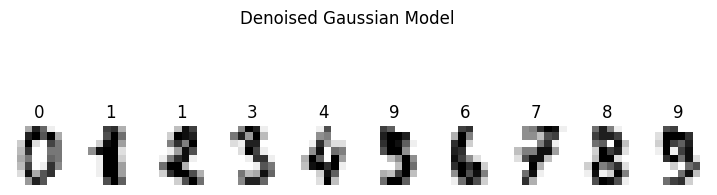

In [31]:
X_train_denoised_reshaped = X_train_denoised.reshape(X_train.shape[0], -1)
model_1_denoised = GaussianNB()
model_1_denoised.fit(X_train_denoised_reshaped, y_train)
model1_denoised_results = model_1_denoised.predict(X_test_reshaped)

denoised_Model1_Overall_Accuracy = OverallAccuracy(model1_denoised_results, y_test)
print("The accuracy of the denoised Gaussian model is " + str(denoised_Model1_Overall_Accuracy))
print_numbers(allnumbers_images, model_1_denoised.predict(reshaped_num), 'Denoised Gaussian Model')

The accuracy of the denoised KNN model is 0.8164967562557924


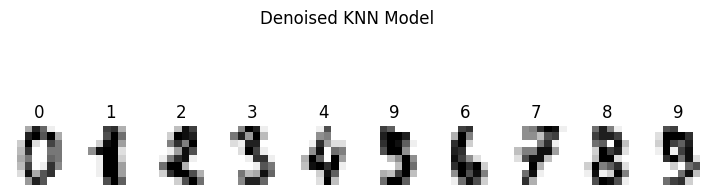

In [29]:
model_2_denoised = KNeighborsClassifier(n_neighbors=10)
model_2_denoised.fit(X_train_denoised_reshaped, y_train)
model2_denoised_results = model_2_denoised.predict(X_test_reshaped)
denoised_Model2_Overall_Accuracy = OverallAccuracy(model2_denoised_results, y_test)
print("The accuracy of the denoised KNN model is " + str(denoised_Model2_Overall_Accuracy))
print_numbers(allnumbers_images, model_2_denoised.predict(reshaped_num), 'Denoised KNN Model')

c:\Users\laksh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


The accuracy of the denoised MLP model is 0.8035217794253939


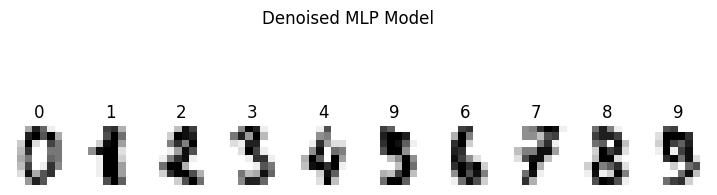

In [28]:
model_3_denoised = MLPClassifier(random_state=0)
model_3_denoised.fit(X_train_denoised_reshaped, y_train)
model3_denoised_results = model_3_denoised.predict(X_test_reshaped)
denoised_Model3_Overall_Accuracy = OverallAccuracy(model3_denoised_results, y_test)
print("The accuracy of the denoised MLP model is " + str(denoised_Model3_Overall_Accuracy))
print_numbers(allnumbers_images, model_3_denoised.predict(reshaped_num), 'Denoised MLP Model')